In [136]:
# Importing our modules, packages, and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Series

Two important data types defined by pandas are ``Series`` and ``DataFrames``.

You can think of a ``Series`` as a "column" of data, suich as a collection of observations on a single variable.

A DataFrame is an object for storing related columns of data.

But Series provide more than NumPy arrays. Not only do they have some additional (statistically oriented methods).

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [137]:
# Initializing a series - input a list and you can assign a name
s = pd.Series(np.random.randn(4), name="champion winrates")
s

0   -0.837669
1   -0.770415
2    1.161852
3   -0.517420
Name: champion winrates, dtype: float64

In [138]:
# Manipulations to data
print(s * 100)
print(np.abs(s))

0    -83.766921
1    -77.041486
2    116.185169
3    -51.742047
Name: champion winrates, dtype: float64
0    0.837669
1    0.770415
2    1.161852
3    0.517420
Name: champion winrates, dtype: float64


In [139]:
s.describe() # Describes statistical data 

count    4.000000
mean    -0.240913
std      0.945286
min     -0.837669
25%     -0.787228
50%     -0.643918
75%     -0.097602
max      1.161852
Name: champion winrates, dtype: float64

In [140]:
# Renaming row values
s.index = ['AMIN', 'KAYNE', 'Hello', 'YES']
s

AMIN    -0.837669
KAYNE   -0.770415
Hello    1.161852
YES     -0.517420
Name: champion winrates, dtype: float64

In [141]:
# Finding values from index, similar to key value pairing in dictionary
s['AMIN'] = 1
s['AMIN']

1.0

# DataFrames
While a ``Series`` is a single column of data, a ``DataFrame`` is a combination of columns, one for each variable.

A ``DataFrame`` in pandas is pretty similar to an Excel spreadsheet with lots of functionality.

It is a powerful tool for representing and analyzing data organized into rows and columns.

In [142]:
covid_df = pd.read_csv('./usa_county_wise.csv') # Read excel sheet to a dataFrame (JSON, tables, etc.)
type(covid_df)

pandas.core.frame.DataFrame

### Viewing Data in DataFrame

In [143]:
covid_df.head() # Looking at the dataFrame 

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",1/22/20,0,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",1/22/20,0,0


In [144]:
covid_df.describe() # Describes statistical data for all columns

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,2.374690e+05,237469.000000,237323.000000,237469.000000,237469.000000,237469.000000,237469.000000
mean,8.390300e+07,839.444205,32090.929560,37.183790,-89.174224,7.659294,0.151691
std,3.291996e+06,18.088416,17822.449027,8.621715,21.435390,279.813276,6.906155
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000,0.000000
25%,8.401904e+07,840.000000,19037.000000,34.237321,-98.037489,0.000000,0.000000
50%,8.403005e+07,840.000000,30045.000000,38.147359,-89.825123,0.000000,0.000000
75%,8.404701e+07,840.000000,47011.000000,41.684463,-82.793570,0.000000,0.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,57159.000000,1584.000000


### Finding columns with all rows or all rows with some columns

In [145]:
covid_df[2:5] # Choose specific rows

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",1/22/20,0,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",1/22/20,0,0


In [146]:
covid_df[['UID', 'iso2']] # Choose specific columns to look at through list

,UID,iso2
0,16,AS
1,316,GU
2,580,MP
3,630,PR
4,850,VI
...,...,...
237464,84090053,US
237465,84090054,US
237466,84090055,US
237467,84090056,US


### Finding Specific Columns and Specific Rows

In [147]:
covid_df.iloc[2:5, 0:4] # iloc uses the indices not the names

,UID,iso2,iso3,code3
2,580,MP,MNP,580
3,630,PR,PRI,630
4,850,VI,VIR,850


In [113]:
covid_df.loc[covid_df.index[2:5], ['UID', 'iso2', 'iso3', 'code3']] # use namings to find rows & columns

,UID,iso2,iso3,code3
2,580,MP,MNP,580
3,630,PR,PRI,630
4,850,VI,VIR,850


In [115]:
covid_df[covid_df['Lat']<18] # Find certain values satisfying a condition

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",1/22/20,0,0
3149,84080001,US,USA,840,80001.0,Out of AL,Alabama,US,0.0000,0.0000,"Out of AL, Alabama, US",1/22/20,0,0
3150,84080002,US,USA,840,80002.0,Out of AK,Alaska,US,0.0000,0.0000,"Out of AK, Alaska, US",1/22/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237464,84090053,US,USA,840,90053.0,Unassigned,Washington,US,0.0000,0.0000,"Unassigned, Washington, US",4/3/20,501,0
237465,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0000,0.0000,"Unassigned, West Virginia, US",4/3/20,0,0
237466,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0000,0.0000,"Unassigned, Wisconsin, US",4/3/20,0,4
237467,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,"Unassigned, Wyoming, US",4/3/20,0,0


You can also redefine what the index if you have a unique column value

In [ ]:
covid_df_copy = covid_df.set_index('code3') # Setting a value as the index
covid_df_copy.iloc[1:3]

## Manipulating Values

In [124]:
covid_df[['UID']][0:2]

,UID
0,16
1,316


In [127]:
covid_df['UID'] *= 1e3 # Changing value
covid_df[['UID']][0:2]

,UID
0,16000000.0
1,316000000.0


In [131]:
covid_df[1:5]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
1,3.160000e+08,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,5.800000e+08,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,6.300000e+08,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",1/22/20,0,0
4,8.500000e+08,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",1/22/20,0,0
5,8.400100e+13,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0,0
6,8.400100e+13,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0,0
7,8.400100e+13,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0,0
8,8.400101e+13,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0,0
9,8.400101e+13,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0,0


In [134]:
# Adding in new column
covid_df['code4'] = covid_df['code3'] * 1e4 
covid_df[1:5]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,code4
1,3.160000e+08,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0,3160000.0
2,5.800000e+08,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0,5800000.0
3,6.300000e+08,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",1/22/20,0,0,6300000.0
4,8.500000e+08,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",1/22/20,0,0,8500000.0
5,8.400100e+13,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0,0,8400000.0
6,8.400100e+13,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0,0,8400000.0
7,8.400100e+13,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0,0,8400000.0
8,8.400101e+13,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0,0,8400000.0
9,8.400101e+13,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0,0,8400000.0


### Sorting Data

In [135]:
covid_df = covid_df.sort_values(by='Lat', ascending=False) # Sorting values to be in a specific way
covid_df[1:10]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths,code4
52138,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/7/20,0,0,8400000.0
91174,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/19/20,0,0,8400000.0
32620,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/1/20,0,0,8400000.0
188764,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",3/20/20,0,0,8400000.0
110692,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/25/20,0,0,8400000.0
185511,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",3/19/20,0,0,8400000.0
42379,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/4/20,0,0,8400000.0
104186,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",2/23/20,0,0,8400000.0
214788,8.400218e+13,US,USA,840,2185.0,North Slope,Alaska,US,69.314792,-153.483609,"North Slope, Alaska, US",3/28/20,0,0,8400000.0


### Additional Values

In [152]:
covid_df.isnull()[1:10] # Data is flawed sometimes - see if it is null

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [153]:
covid_df.isnull().sum() # see how many null values there are

UID                 0
iso2                0
iso3                0
code3               0
FIPS              146
Admin2            511
Province_State      0
Country_Region      0
Lat                 0
Long_               0
Combined_Key        0
Date                0
Confirmed           0
Deaths              0
dtype: int64

In [154]:
covid_df.groupby(['Province_State']).mean() # Group by to see similarity based on categorical variables

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
Province_State,,,,,,,
Alabama,8.400350e+07,840.0,3499.869565,31.931113,-84.196785,1.931705,0.029780
Alaska,8.400749e+07,840.0,7494.967742,56.373544,-136.429656,0.500663,0.009722
American Samoa,1.600000e+01,16.0,60.000000,-14.271000,-170.132000,0.000000,0.000000
Arizona,8.401354e+07,840.0,13542.117647,29.714033,-98.349911,9.669621,0.173247
Arkansas,8.400715e+07,840.0,7151.103896,34.005087,-90.033096,1.005515,0.012275
California,8.400869e+07,840.0,8689.600000,36.582496,-116.704308,19.256393,0.398174
Colorado,8.401039e+07,840.0,10393.924242,37.755612,-102.289687,5.668950,0.112910
Connecticut,8.402421e+07,840.0,24208.200000,33.290944,-58.125464,36.805479,0.834247
Delaware,8.404001e+07,840.0,40005.800000,23.465566,-45.319942,8.369863,0.183562


In [157]:
# Grouping by both province_state and combined_key for mean
covid_df.groupby(['Province_State', 'Combined_Key']).mean()

UID  code3     FIPS        Lat  \
Province_State Combined_Key                                                     
Alabama        Autauga, Alabama, US     84001001.0  840.0   1001.0  32.539527   
               Baldwin, Alabama, US     84001003.0  840.0   1003.0  30.727750   
               Barbour, Alabama, US     84001005.0  840.0   1005.0  31.868263   
               Bibb, Alabama, US        84001007.0  840.0   1007.0  32.996421   
               Blount, Alabama, US      84001009.0  840.0   1009.0  33.982109   
...                                            ...    ...      ...        ...   
Wyoming        Teton, Wyoming, US       84056039.0  840.0  56039.0  43.935225   
               Uinta, Wyoming, US       84056041.0  840.0  56041.0  41.287818   
               Unassigned, Wyoming, US  84090056.0  840.0  90056.0   0.000000   
               Washakie, Wyoming, US    84056043.0  840.0  56043.0  43.904516   
               Weston, Wyoming, US      84056045.0  840.0  56045.0  43.839612   

                                             Long_  Confirmed    Deaths  
Province_State Combined_Key                                              
Alabama        Autauga, Alabama, US     -86.644082   0.986301  0.000000  
               Baldwin, Alabama, US     -87.722071   2.273973  0.082192  
               Barbour, Alabama, US     -85.387129   0.013699  0.000000  
               Bibb, Alabama, US        -87.125115   0.219178  0.000000  
               Blount, Alabama, US      -86.567906   0.643836  0.000000  
...                                            ...        ...       ...  
Wyoming        Teton, Wyoming, US      -110.589080   2.506849  0.000000  
               Uinta, Wyoming, US      -110.547578   0.027397  0.000000  
               Unassigned, Wyoming, US    0.000000   0.000000  0.000000  
               Washakie, Wyoming, US   -107.680187   0.123288  0.000000  
               Weston, Wyoming, US     -104.567488   0.000000  0.000000  

[3253 rows x 7 columns]

In [159]:
# Combining choosing data and grouping it
covid_df[covid_df['Lat']<18].groupby(['Province_State', 'Combined_Key']).mean()  # Combining methods together

UID  code3     FIPS  \
Province_State Combined_Key                                                
Alabama        Out of AL, Alabama, US         84080001.0  840.0  80001.0   
               Unassigned, Alabama, US        84090001.0  840.0  90001.0   
Alaska         Out of AK, Alaska, US          84080002.0  840.0  80002.0   
               Unassigned, Alaska, US         84090002.0  840.0  90002.0   
American Samoa American Samoa, US                   16.0   16.0     60.0   
...                                                  ...    ...      ...   
West Virginia  Unassigned, West Virginia, US  84090054.0  840.0  90054.0   
Wisconsin      Out of WI, Wisconsin, US       84080055.0  840.0  80055.0   
               Unassigned, Wisconsin, US      84090055.0  840.0  90055.0   
Wyoming        Out of WY, Wyoming, US         84080056.0  840.0  80056.0   
               Unassigned, Wyoming, US        84090056.0  840.0  90056.0   

                                                 Lat    Long_  Confirmed  \
Province_State Combined_Key                                                
Alabama        Out of AL, Alabama, US          0.000    0.000   0.000000   
               Unassigned, Alabama, US         0.000    0.000   0.054795   
Alaska         Out of AK, Alaska, US           0.000    0.000   0.000000   
               Unassigned, Alaska, US          0.000    0.000   0.013699   
American Samoa American Samoa, US            -14.271 -170.132   0.000000   
...                                              ...      ...        ...   
West Virginia  Unassigned, West Virginia, US   0.000    0.000   0.000000   
Wisconsin      Out of WI, Wisconsin, US        0.000    0.000   0.000000   
               Unassigned, Wisconsin, US       0.000    0.000   0.835616   
Wyoming        Out of WY, Wyoming, US          0.000    0.000   0.000000   
               Unassigned, Wyoming, US         0.000    0.000   0.000000   

                                                Deaths  
Province_State Combined_Key                             
Alabama        Out of AL, Alabama, US         0.000000  
               Unassigned, Alabama, US        0.178082  
Alaska         Out of AK, Alaska, US          0.000000  
               Unassigned, Alaska, US         0.205479  
American Samoa American Samoa, US             0.000000  
...                                                ...  
West Virginia  Unassigned, West Virginia, US  0.013699  
Wisconsin      Out of WI, Wisconsin, US       0.000000  
               Unassigned, Wisconsin, US      0.123288  
Wyoming        Out of WY, Wyoming, US         0.000000  
               Unassigned, Wyoming, US        0.000000  

[107 rows x 7 columns]

### Graphing

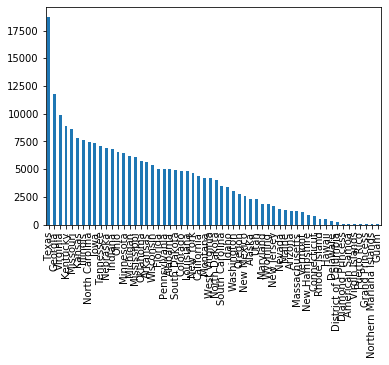

In [160]:
pd.value_counts(covid_df['Province_State']).plot.bar() # counts of certain and build graph of it